type
Movie      6126
TV Show    2664
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_5352\372226240.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=count_by_type.index,y=count_by_type.values,palette='Set2')


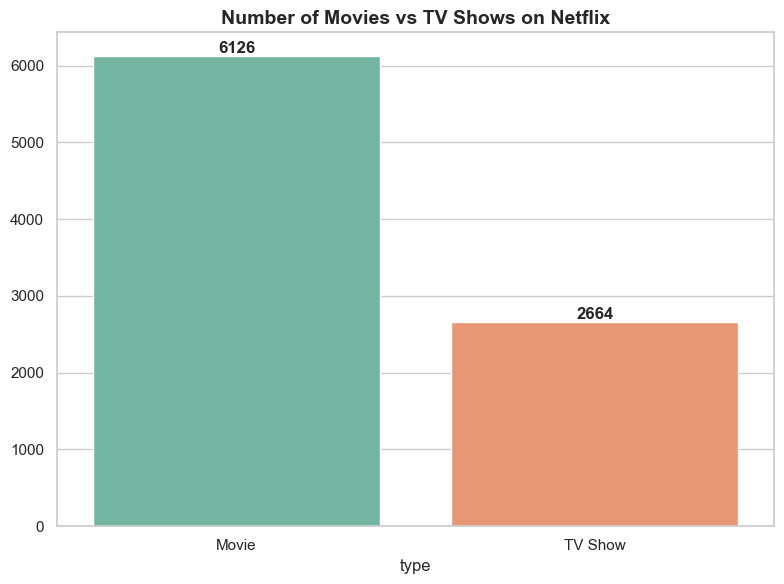

In [ ]:
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns
data = pd.read_csv('netflix1.csv')
#Q1. Content Type Distribution (Movies vs. TV Shows)
# count the number of movies and tv shows
count_by_type = data['type'].value_counts()
print(count_by_type)

#set the visual style
sns.set(style='whitegrid')

 #set up the figure size
plt.figure(figsize=(8, 6 ))

 #create the barplot
ax=sns.barplot(x=count_by_type.index,y=count_by_type.values,palette='Set2')

 #add value label on each bar,
for i, value in enumerate(count_by_type.values):
 ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

   ## Set plot title and axis labels
plt.title('Number of Movies vs TV Shows on Netflix', fontsize=14, fontweight='bold')
plt.title('Number of Movies vs TV Shows on Netflix', fontsize=14, fontweight='bold')

  #display the plot
plt.tight_layout()
plt.show()

 #2. Most Common Genres

C:\Users\hp\AppData\Local\Temp\ipykernel_5352\3249790346.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set2')


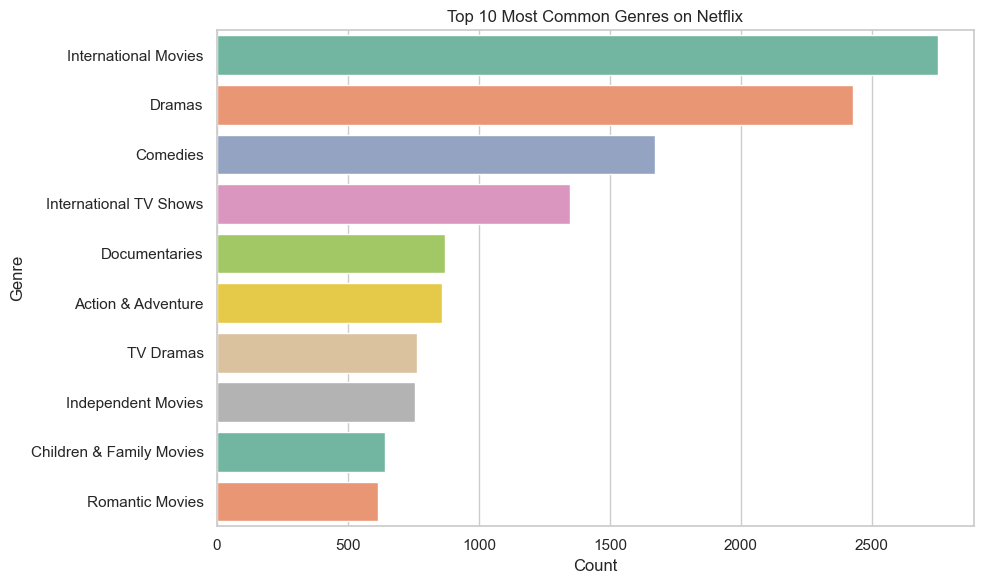

In [3]:
# Q2 Most common genres

# Drop missing values in the 'listed_in' column
data = data.dropna(subset=['listed_in'])

# Split and flatten the genres
genres = data['listed_in'].str.split(', ').explode()

# Count top 10 genres
top_genres = genres.value_counts().head(10)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set2')



plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()



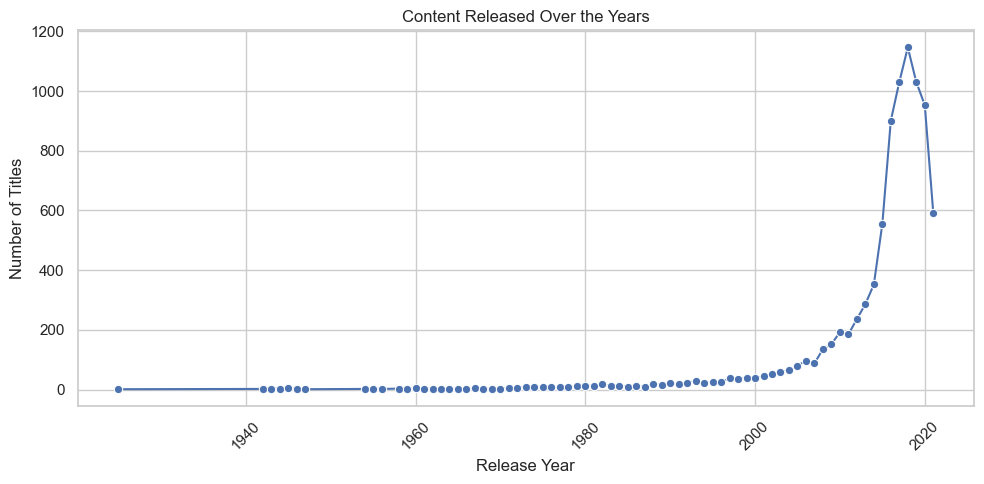

In [4]:
# Q3 Content added over time
# Drop missing years
data = data.dropna(subset=['release_year'])

# Count the number of releases per year
release_trend = data['release_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o')
plt.title('Content Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_5352\359350918.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')


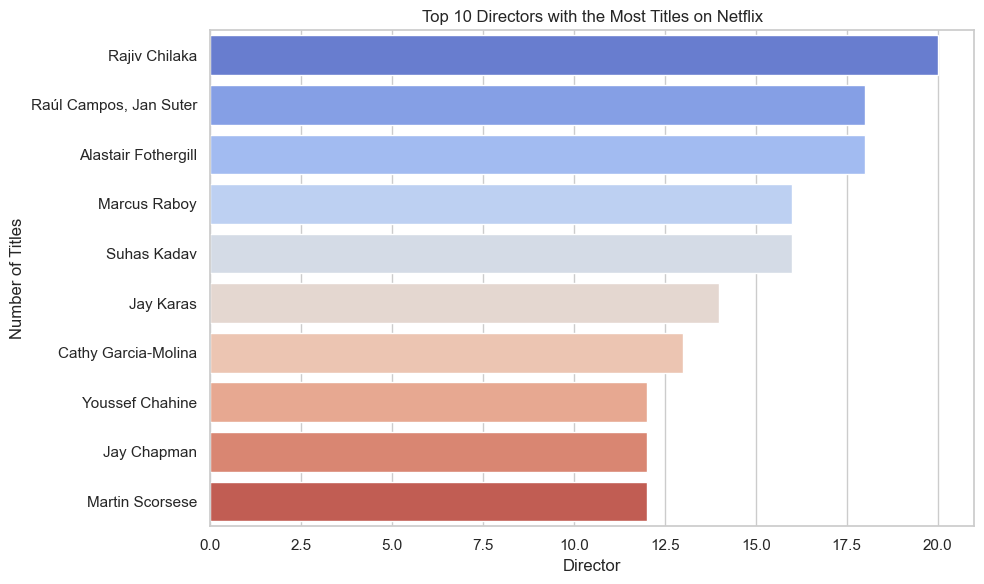

In [7]:
#Q4 top 10 directors with the most titles
# Remove rows where the director is "Not Given"
data = data[data['director'].str.strip().str.lower() != 'not given']

# Drop missing values in the 'director' column
data = data.dropna(subset=['director'])

# Count number of titles per director
top_directors = data['director'].value_counts().head(10)

# Display the top 10
print(top_directors)

# Plot the top 10 directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')

plt.title('Top 10 Directors with the Most Titles on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

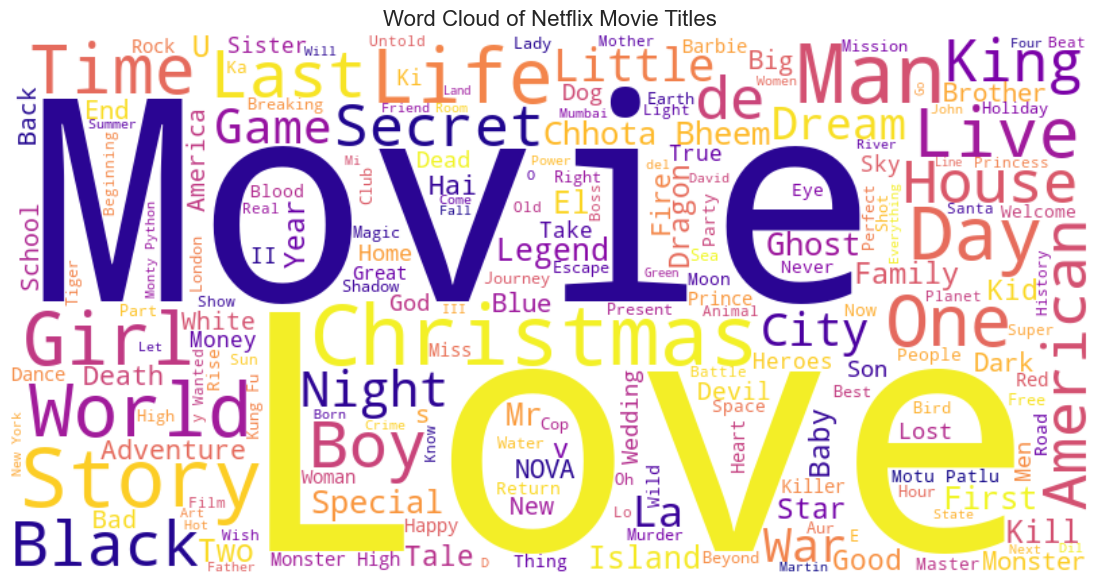

In [10]:
# Q5  5. Word Cloud of Movie Title
from wordcloud import WordCloud
# Filter only movies
movies = data[data['type'] == 'Movie']

# Drop missing titles
movies = movies.dropna(subset=['title'])

# Combine all movie titles into one string
title_text = ' '.join(movies['title'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(title_text)


# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Movie Titles', fontsize=16)
plt.tight_layout()
plt.show()

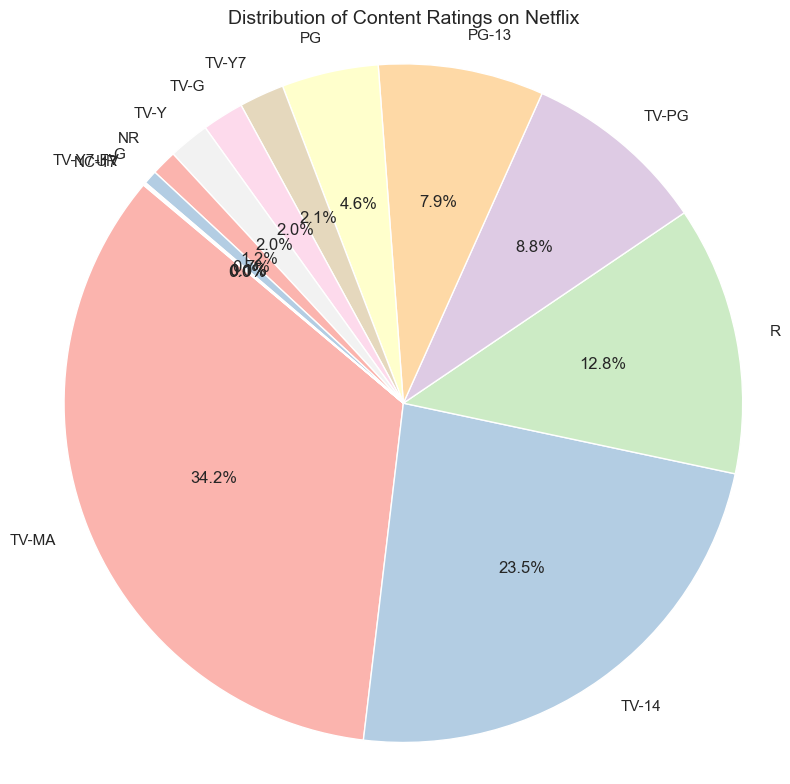

In [12]:
# Q6 Rating on netflix on a pie chart

# Drop missing or "Not Given" ratings
data = data.dropna(subset=['rating'])
data = data[~data['rating'].str.lower().str.strip().eq('not given')]

# Count each rating type
rating_counts = data['rating'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Content Ratings on Netflix', fontsize=14)
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.show()
